In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load processed dataset
df = pd.read_csv("../data/processed/iris_processed.csv")

# Peek at the data
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.897674,1.015602,-1.335752,-1.311052,0
1,-1.139200,-0.131539,-1.335752,-1.311052,0
2,-1.380727,0.327318,-1.392399,-1.311052,0
3,-1.501490,0.097889,-1.279104,-1.311052,0
4,-1.018437,1.245030,-1.335752,-1.311052,0


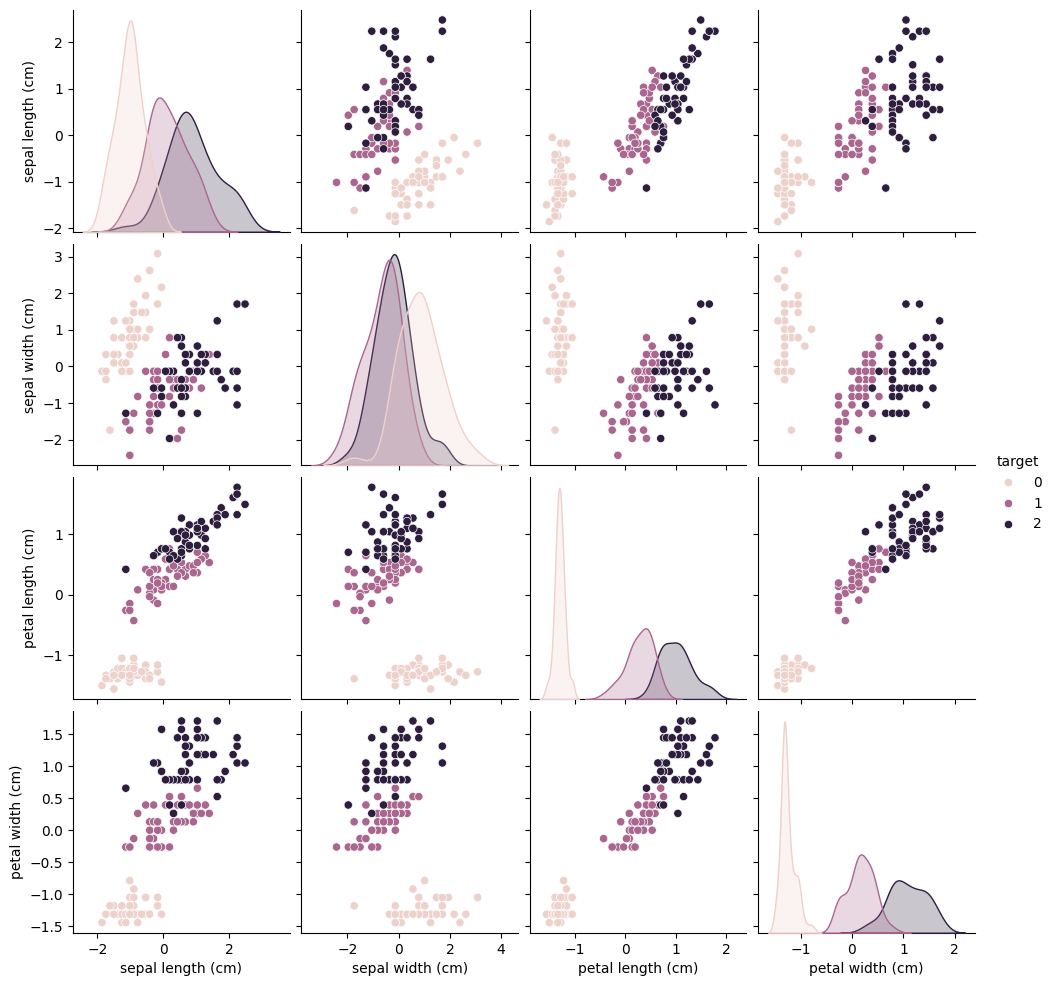

In [29]:
# Create a pair plot using seaborn
# - df: the DataFrame containing the data
# - hue="target": color-code the points based on the 'target' column values
#   (different colors for different classes/categories in 'target')
# - diag_kind="kde": on the diagonal (where variable is plotted against itself),
#   use Kernel Density Estimation (KDE) plots instead of histograms
sns.pairplot(df, hue="target", diag_kind="kde")

# Display the plot on screen
plt.show()

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df.drop(columns=["target"])
y = df["target"]

In [31]:
#Split into Train/Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

import mlflow
import mlflow.sklearn

# Optional: make sure MLflow UI reads from the right folder
# mlflow.set_tracking_uri("file:/full/path/to/mlruns")

mlflow.set_experiment("iris_experiment")
#mlflow.set_tracking_uri("http://127.0.0.1:5000/")  # Adjust if using a remote MLflow server

def train_and_log_model(model, model_name):
    with mlflow.start_run(run_name=model_name) as run:
        # Train
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)

        # Log params, metrics, model
        mlflow.log_param("model_type", model_name)
        mlflow.log_metric("accuracy", acc)

        # Log model artifact
        mlflow.sklearn.log_model(model, model_name)

        # Register model in MLflow Model Registry
        mlflow.register_model(
            model_uri=f"runs:/{run.info.run_id}/{model_name}",
            name=model_name
        )

        print(f"{model_name} Accuracy: {acc:.4f}")


2025/08/11 21:43:02 INFO mlflow.tracking.fluent: Experiment with name 'iris_experiment' does not exist. Creating a new experiment.


In [37]:
# Train and log
train_and_log_model(LogisticRegression(max_iter=200), "LogisticRegression")
train_and_log_model(RandomForestClassifier(n_estimators=100), "RandomForest")

2025/08/11 21:43:05 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/08/11 21:43:07 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'LogisticRegression'.
2025/08/11 21:43:07 WARNING mlflow.tracking._model_registry.fluent: Run with id 18995c6fa6b34ee4a84761880c904c53 has no artifacts at artifact path 'LogisticRegression', registering model based on models:/m-ea955648929c4545b5ffccfcc6f280c2 instead
2025/08/11 21:43:07 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: LogisticRegression, version 1
Created version '1' of model 'LogisticRegression'.
2025/08/11 21:43:07 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


LogisticRegression Accuracy: 1.0000
🏃 View run LogisticRegression at: http://127.0.0.1:5000/#/experiments/914595201092088808/runs/18995c6fa6b34ee4a84761880c904c53
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/914595201092088808


2025/08/11 21:43:08 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'RandomForest'.
2025/08/11 21:43:08 WARNING mlflow.tracking._model_registry.fluent: Run with id 839c1e75cf1f4d64a104a8a75ab6cbe2 has no artifacts at artifact path 'RandomForest', registering model based on models:/m-6765d789515848369fa97a6149ca7763 instead
2025/08/11 21:43:08 INFO mlflow.store.model_registry.abstract_store: Waiting up to 300 seconds for model version to finish creation. Model name: RandomForest, version 1


RandomForest Accuracy: 1.0000
🏃 View run RandomForest at: http://127.0.0.1:5000/#/experiments/914595201092088808/runs/839c1e75cf1f4d64a104a8a75ab6cbe2
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/914595201092088808


Created version '1' of model 'RandomForest'.


In [38]:
import mlflow
import mlflow.sklearn

# Load model by name and stage
model_name = "LogisticRegression"
stage = "Staging"  # Could also be "Production" or "Archived"

model = mlflow.sklearn.load_model(f"models:/{model_name}/{stage}")

# Example: use it for predictions
preds = model.predict(X_test)
print(preds)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [39]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import mlflow

# Calculate metrics
acc = accuracy_score(y_test, preds)
f1 = f1_score(y_test, preds, average="weighted")
cm = confusion_matrix(y_test, preds)

# Log to MLflow
mlflow.log_metric("accuracy", acc)
mlflow.log_metric("f1_score", f1)

# Print in notebook
print("📊 Model Evaluation Metrics")
print(f"Accuracy: {acc:.4f}")
print(f"F1 Score (weighted): {f1:.4f}")
print("\nConfusion Matrix:")
print(cm)

📊 Model Evaluation Metrics
Accuracy: 1.0000
F1 Score (weighted): 1.0000

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


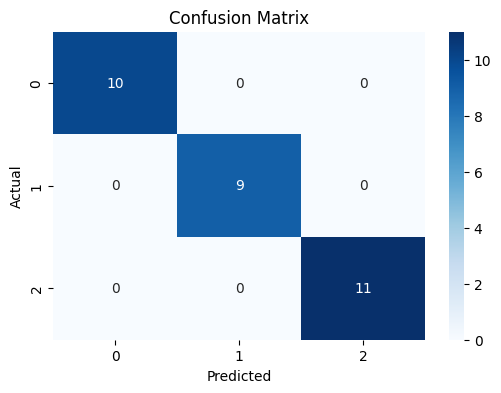

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()